In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

### Load data

In [2]:
dataset = MNIST(root='data/', download=True)
len(dataset)

0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz to data/MNIST\raw\train-images-idx3-ubyte.gz
 98%|█████████▊| 9707520/9912422 [00:09<00:00, 1181335.13it/s]Extracting data/MNIST\raw\train-images-idx3-ubyte.gz to data/MNIST\raw

0it [00:00, ?it/s]Downloading http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz to data/MNIST\raw\train-labels-idx1-ubyte.gz

 57%|█████▋    | 16384/28881 [00:00<00:00, 97727.83it/s]

0it [00:00, ?it/s]Extracting data/MNIST\raw\train-labels-idx1-ubyte.gz to data/MNIST\raw


  0%|          | 0/1648877 [00:00<?, ?it/s]

  1%|          | 16384/1648877 [00:00<00:19, 85292.38it/s]

  3%|▎         | 49152/1648877 [00:00<00:15, 102344.11it/s]

  6%|▌         | 98304/1648877 [00:00<00:12, 127041.03it/s]

 13%|█▎        | 212992/1648877 [00:01<00:08, 167809.71it/s]

 26%|██▋       | 434176/1648877 [00:01<00:05, 227650.40it/s]

 53%|█████▎    | 876544/1648877 [00:01<00:02, 313723.49it/s]


0it [00:00, ?it/s]Extracting dat

60000

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

32768it [00:22, 1472.40it/s] 
1654784it [00:21, 76306.30it/s] 
8192it [00:20, 406.51it/s]              
9920512it [00:31, 310361.94it/s] 


In [4]:
import torchvision.transforms as transforms

In [6]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


### Train and Validation Datasets

In [7]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [8]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

### Build the model

In [9]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [10]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0278,  0.0230, -0.0103,  ...,  0.0343, -0.0188, -0.0117],
        [-0.0296,  0.0317, -0.0222,  ...,  0.0018,  0.0263,  0.0320],
        [ 0.0312,  0.0045,  0.0352,  ...,  0.0211, -0.0192, -0.0159],
        ...,
        [ 0.0069,  0.0264, -0.0171,  ...,  0.0152, -0.0015,  0.0264],
        [ 0.0046,  0.0297,  0.0309,  ...,  0.0128,  0.0069,  0.0006],
        [ 0.0099,  0.0333, -0.0123,  ..., -0.0247,  0.0197, -0.0236]],
       requires_grad=True)

In [11]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0111,  0.0230,  0.0276, -0.0079, -0.0270,  0.0272,  0.0047, -0.0118,
         0.0270,  0.0125], requires_grad=True)

In [12]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside the forward method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into self.linear.

`xb.reshape(-1, 28*28)` indicates to PyTorch that we want a view of the xb tensor with two dimensions. The length along the 2nd dimension is 28*28 (i.e., 784). One argument to .reshape can be set to -1 (in this case, the first dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.

Note that the model no longer has `.weight` and `.bias` attributes (as they are now inside the `.linear` attribute), but it does have a `.parameters` method that returns a list containing the weights and bias.

In [13]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [14]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 2.2316e-02, -3.1596e-02,  1.8287e-02,  ...,  2.8215e-02,
           3.0273e-02, -2.5067e-02],
         [-1.0888e-02,  3.3763e-02,  3.6601e-03,  ..., -7.1888e-03,
           9.6768e-03,  2.6031e-02],
         [ 4.2702e-03,  8.6183e-03, -2.2151e-02,  ...,  3.2740e-02,
           8.5901e-05, -3.3418e-03],
         ...,
         [ 5.1565e-03,  1.4341e-02,  1.8821e-02,  ...,  3.3715e-02,
          -3.0502e-02, -1.1514e-02],
         [ 1.2189e-02, -2.9923e-03, -1.0049e-02,  ...,  8.8648e-03,
           3.5244e-03,  1.2490e-02],
         [-4.5017e-04, -1.1979e-02, -1.2489e-02,  ..., -8.5717e-03,
           8.6671e-04,  2.9304e-02]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0280, -0.0017,  0.0229, -0.0023,  0.0296, -0.0216,  0.0168,  0.0228,
          0.0292, -0.0149], requires_grad=True)]

In [15]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0750,  0.1053,  0.0754, -0.0152,  0.0472,  0.1998,  0.4316,  0.3164,
          0.2716, -0.1980],
        [ 0.0407, -0.2318, -0.0026, -0.0685,  0.1978,  0.1004,  0.0492,  0.1550,
          0.2455, -0.2234]])


In [16]:
import torch.nn.functional as F

In [17]:
outputs[:2]

tensor([[ 0.0750,  0.1053,  0.0754, -0.0152,  0.0472,  0.1998,  0.4316,  0.3164,
          0.2716, -0.1980],
        [ 0.0407, -0.2318, -0.0026, -0.0685,  0.1978,  0.1004,  0.0492,  0.1550,
          0.2455, -0.2234]], grad_fn=<SliceBackward>)

In [18]:
# Apply softmax for each output row
# The softmax function is included in the torch.nn.functional package and requires us to specify a dimension along which the function should be applied.
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0932, 0.0961, 0.0932, 0.0852, 0.0906, 0.1056, 0.1331, 0.1186, 0.1134,
         0.0709],
        [0.1003, 0.0764, 0.0960, 0.0899, 0.1173, 0.1064, 0.1011, 0.1124, 0.1231,
         0.0770]])
Sum:  1.0


In [19]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 8, 4, 7, 6, 0, 6, 4, 4, 4, 0, 0, 4, 8, 0, 1, 4, 0, 4, 0, 0, 7, 7, 4,
        0, 3, 0, 7, 4, 7, 4, 7, 0, 1, 5, 5, 7, 1, 4, 4, 5, 4, 4, 1, 8, 8, 1, 0,
        1, 4, 8, 0, 7, 8, 8, 8, 6, 7, 8, 7, 4, 7, 4, 2, 1, 1, 4, 4, 0, 8, 8, 8,
        4, 0, 8, 5, 7, 5, 4, 7, 8, 4, 4, 0, 0, 4, 0, 7, 0, 4, 0, 4, 4, 1, 0, 7,
        1, 0, 5, 4, 8, 0, 1, 0, 8, 4, 1, 7, 0, 4, 7, 0, 2, 8, 8, 0, 8, 8, 0, 4,
        0, 4, 8, 4, 0, 0, 4, 7])
tensor([0.1331, 0.1231, 0.1445, 0.1369, 0.1140, 0.1426, 0.1223, 0.1355, 0.1271,
        0.1166, 0.1411, 0.1303, 0.1358, 0.1306, 0.1277, 0.1468, 0.1532, 0.1243,
        0.1211, 0.1351, 0.1408, 0.1248, 0.1232, 0.1372, 0.1404, 0.1177, 0.1430,
        0.1267, 0.1382, 0.1306, 0.1484, 0.1455, 0.1676, 0.1290, 0.1243, 0.1356,
        0.1383, 0.1251, 0.1378, 0.1208, 0.1258, 0.1350, 0.1360, 0.1202, 0.1301,
        0.1461, 0.1413, 0.1298, 0.1345, 0.1396, 0.1270, 0.1495, 0.1269, 0.1411,
        0.1577, 0.1264, 0.1438, 0.1263, 0.1488, 0.1162, 0.1118, 0.1291, 0.1541,
       

### Evaluation and Loss Fn

In [20]:
torch.sum(preds == labels)

tensor(15)

In [21]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

The `==` operator performs an element-wise comparison of two tensors with the same shape and returns a tensor of the same shape, containing True for unequal elements and False for equal elements. Passing the result to torch.sum returns the number of labels that were predicted correctly. Finally, we divide by the total number of images to get the accuracy.

Note that we don't need to apply softmax to the outputs since its results have the same relative order. This is because e^x is an increasing function, i.e., if y1 > y2, then e^y1 > e^y2. The same holds after averaging out the values to get the softmax.

In [22]:
accuracy(outputs, labels)

tensor(0.1172)

We can't use accuracy as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. torch.max and == are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.

For these reasons, accuracy is often used as an evaluation metric for classification, but not as a loss function. A commonly used loss function for classification problems is the cross-entropy

- For each output row, pick the predicted probability for the correct label. E.g., if the predicted probabilities for an image are (0.1, 0.3, 0.2, ...) and the correct label is 1, we pick the corresponding element 0.3 and ignore the rest.

- Then, take the logarithm of the picked probability. If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

- Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [23]:
loss_fn = F.cross_entropy
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3350, grad_fn=<NllLossBackward>)


### Training

In [24]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [25]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [26]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [27]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.323796510696411, 'val_acc': 0.0869264230132103}

In [28]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9588, val_acc: 0.5969
Epoch [1], val_loss: 1.6859, val_acc: 0.7237
Epoch [2], val_loss: 1.4816, val_acc: 0.7651
Epoch [3], val_loss: 1.3274, val_acc: 0.7874
Epoch [4], val_loss: 1.2085, val_acc: 0.8010


In [30]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1153, val_acc: 0.8127
Epoch [1], val_loss: 1.0405, val_acc: 0.8215
Epoch [2], val_loss: 0.9793, val_acc: 0.8280
Epoch [3], val_loss: 0.9284, val_acc: 0.8328
Epoch [4], val_loss: 0.8854, val_acc: 0.8359


In [31]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8485, val_acc: 0.8394
Epoch [1], val_loss: 0.8165, val_acc: 0.8416
Epoch [2], val_loss: 0.7885, val_acc: 0.8457
Epoch [3], val_loss: 0.7638, val_acc: 0.8474
Epoch [4], val_loss: 0.7418, val_acc: 0.8498


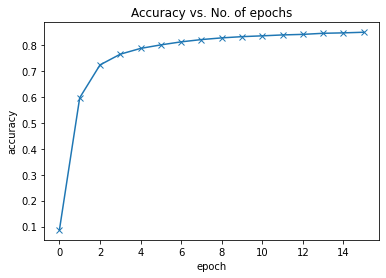

In [32]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

### Testing

In [33]:
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


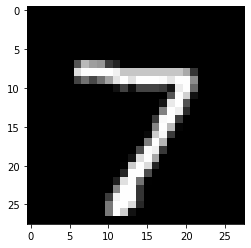

In [34]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

### Saving and loading

In [35]:
torch.save(model.state_dict(), 'mnist-logistic.pth')
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0053,  0.0304, -0.0205,  ...,  0.0203,  0.0334, -0.0187],
                      [-0.0188, -0.0329,  0.0049,  ..., -0.0059, -0.0323, -0.0349],
                      [ 0.0085, -0.0040,  0.0056,  ...,  0.0189, -0.0017, -0.0334],
                      ...,
                      [ 0.0093, -0.0326, -0.0208,  ...,  0.0247, -0.0226, -0.0045],
                      [-0.0297, -0.0080,  0.0095,  ...,  0.0094, -0.0013, -0.0233],
                      [ 0.0222, -0.0242, -0.0296,  ..., -0.0112,  0.0335, -0.0346]])),
             ('linear.bias',
              tensor([-0.0502,  0.0949, -0.0278, -0.0093,  0.0126,  0.0647, -0.0304,  0.0070,
                      -0.0899, -0.0036]))])

In [36]:
model2 = MnistModel()
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 3.2093e-02,  1.3856e-02, -2.6214e-03,  ...,  1.8885e-02,
                       -4.3706e-03, -1.9047e-04],
                      [ 1.1139e-03, -1.2321e-02,  1.9281e-02,  ...,  9.5148e-03,
                       -1.2148e-05, -2.7492e-02],
                      [-2.8532e-02,  1.5415e-02, -3.1569e-02,  ...,  2.7148e-02,
                        1.2085e-02,  8.2781e-03],
                      ...,
                      [-1.8004e-02,  3.4310e-02,  3.1586e-02,  ...,  5.1595e-03,
                       -1.7384e-02,  2.1167e-02],
                      [-3.3949e-02,  2.6765e-02, -2.1813e-02,  ...,  4.8591e-03,
                       -5.4270e-03, -3.5583e-02],
                      [ 3.3676e-02,  3.5190e-02,  2.1401e-02,  ..., -2.5973e-02,
                        3.4570e-02, -3.4327e-02]])),
             ('linear.bias',
              tensor([ 0.0312,  0.0206,  0.0289, -0.0269,  0.0040, -0.0103,  0.0057, -0.0243,
                       0.0244,

In [38]:
test_loader = DataLoader(test_dataset, batch_size=256)
evaluate(model2, test_loader)

{'val_loss': 2.3382320404052734, 'val_acc': 0.06562499701976776}

In [39]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0053,  0.0304, -0.0205,  ...,  0.0203,  0.0334, -0.0187],
                      [-0.0188, -0.0329,  0.0049,  ..., -0.0059, -0.0323, -0.0349],
                      [ 0.0085, -0.0040,  0.0056,  ...,  0.0189, -0.0017, -0.0334],
                      ...,
                      [ 0.0093, -0.0326, -0.0208,  ...,  0.0247, -0.0226, -0.0045],
                      [-0.0297, -0.0080,  0.0095,  ...,  0.0094, -0.0013, -0.0233],
                      [ 0.0222, -0.0242, -0.0296,  ..., -0.0112,  0.0335, -0.0346]])),
             ('linear.bias',
              tensor([-0.0502,  0.0949, -0.0278, -0.0093,  0.0126,  0.0647, -0.0304,  0.0070,
                      -0.0899, -0.0036]))])

In [40]:
evaluate(model2, test_loader)

{'val_loss': 0.7241772413253784, 'val_acc': 0.85107421875}